A moving average process, or the moving average (MA) model, states that the current value is linearly dependent on the current and past error terms. The error terms are assumed to be mutually independent and normally distributed, just like white noise.

A moving average model is denoted as MA(q), where q is the order. The model expresses the present value as a linear combination of the mean of the series $\mu$, the present error term $\epsilon_t$, and past error terms $\epsilon_{t-q}$. The magnitude of the impact of past errors on the present value is quantified using a coefficient denoted as $\theta_q$. Mathematically, we express a general moving average process of order q as
<br/>
<center>$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$</center>

The order q of the moving average model determines the number of past error terms that affect the present value. For example, if it is of order 1, meaning that we have an MA(1) process. Here we can see that the present value $y_t$ is dependent on the mean $\mu$, the present error term $\epsilon_t$, and the error term at the previous timestamp $\theta_1 \epsilon_{t-1}$.
<br/>
<center>$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1}$</center>

If we have a moving average process of order 2, or MA(2), then $y_t$ is dependent on the mean of the series $\mu$, the present error term $\epsilon_t$, the error term at the previous timestep $\theta_1 \epsilon_{t-1}$, and the error term two timesteps prior $\theta_2 \epsilon_{t-2}$
<br/>
<center>$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}$</center>

Hence, we can see how the order q of the MA(q) process affects the number of past error terms that must be included in the model. The larger q is, the more past error terms affect the present value. Therefore, it is important to determine the order of the moving average process in order to fit the appropriate model: if we have a second order moving average process, then a second-order moving average model will be used for forecasting.

### 4.1.1 Identifying the order of a moving average process

To identify the order of a moving average process, we can extend the steps needed to identify a random walk.

As usual, the first step is to gather the data. Then we test for stationarity. If our series is not stationary, we apply transformations, such as differencing, until the series is stationary. Then we plot the ACF and look for significant autocorrelation coefficients.

In the case of a random walk, we will not see significant coefficients after lag 0. On the other hand, if we see significant coefficients, we must check whether they become abruptly non-significant after some lag q. If that is the case, then we know that we have a moving average process of order q. Otherwise, we must follow a different set of steps to discover the underlying process of our time series.

The first step is to gather the data. This step has already been done for you, so this is a great time to load the data into a DataFrame using pandas and display the first five rows of data.

In [26]:
import pandas as pd

df = pd.read_csv('./widget_sales.csv')

df.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


We can plot our data using matplotlib. Our values of interest are in the widget_sales columns, so that is what we pass into ax.plot(). Then we give the x-axis the label of “Time” and y-axis the label of “Widget sales (k$).” Next, we specify that the labels for the ticks on the x-axis should display the month of the year. Finally, we tilt the x-axis tick labels and remove extra whitespace around the figure using plt.tight_layout().

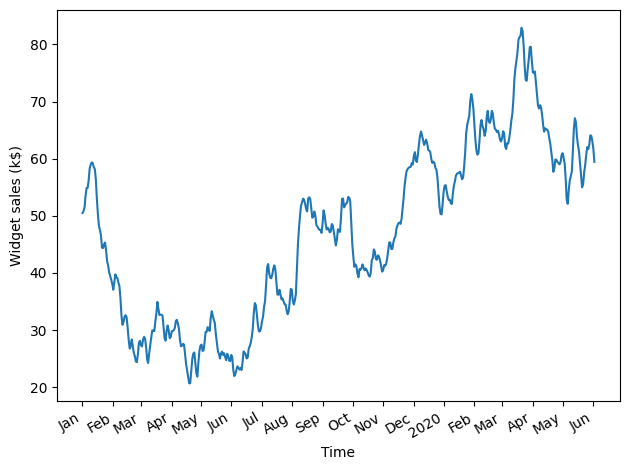

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')
plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()

plt.tight_layout()

The next step is to test for stationarity. We intuitively know that the series is not stationary, since there is an observable trend. Still, we will use the ADF test to make sure. Again, we’ll use the adfuller function from the statsmodels library and extract the ADF statistic and p-value. If the ADF statistic is a large negative number and the p-value is smaller than 0.05, our series is stationary. Otherwise, we must apply transformations.

In [28]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['widget_sales'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605


This results in an ADF statistic of –1.51 and a p-value of 0.53. Here, the ADF statistic is not a large negative number, and the p-value is greater than 0.05. Therefore, our time series is not stationary, and we must apply transformations to make it stationary.

In order to make our series stationary, we will try to stabilize the trend by applying a first-order differencing. We can do so by using the diff method from the numpy library. Remember that this method takes in a parameter n that specifies the order of differencing. In this case, because it is a first-order differencing, n will be equal to 1.

In [29]:
import numpy as np

widget_sales_diff = np.diff(df['widget_sales'], n=1)

We can plot the differenced series to see if we have stabilized the trend. We can see that we successfully removed the long-term trend component of our series, as values are hovering around 0 over the entire period.

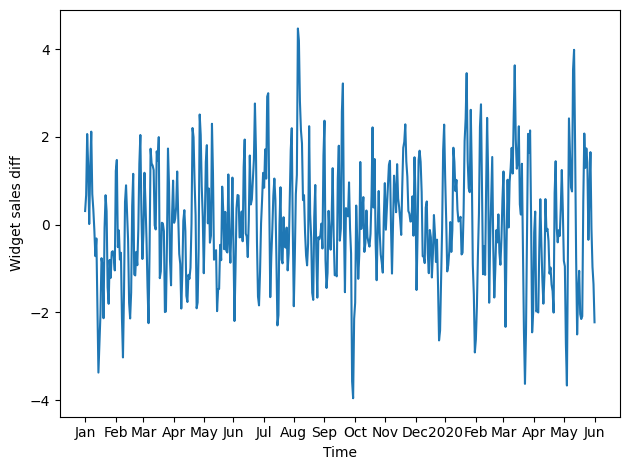

In [30]:
fig, ax = plt.subplots()

ax.plot(widget_sales_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales diff')
plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

plt.tight_layout()

Now that a transformation has been applied to our series, we can test for stationarity again using the ADF test. This time, make sure to run the test on the differenced data stored in the widget_sales_diff variable.

In [31]:
ADF_result = adfuller(widget_sales_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19


This gives an ADF statistic of –10.6 and a p-value of $7 x 10^-19$. Therefore, with a large negative ADF statistic and a p-value much smaller than 0.05, we can say that our series is stationary.

Our next step is to plot the autocorrelation function. The statsmodels library conveniently includes the plot_acf function. We simply pass in our differenced series and specify the number of lags in the lags parameter. Remember that the number of lags determines the range of values on the x-axis.

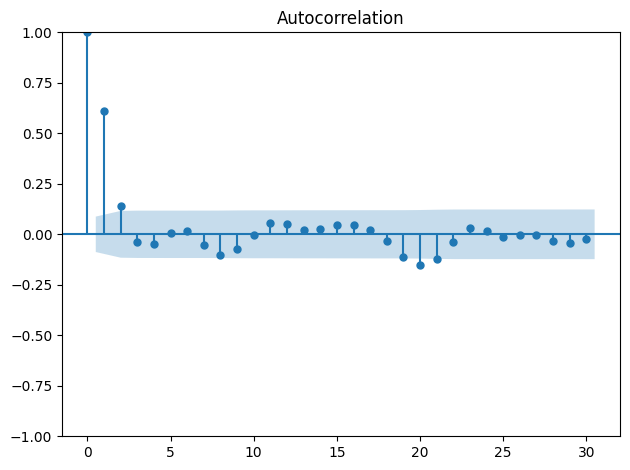

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(widget_sales_diff, lags=30);

plt.tight_layout()

The resulting ACF plot is shown in figure 4.6. You’ll notice that there are significant coefficients up until lag 2. Then they abruptly become non-significant, as they remain in the shaded area of the plot. This means that we have a stationary moving average process of order 2. We can use a second-order moving average model, or MA(2) model, to forecast our stationary time series.

You can see how the ACF plot helps us determine the order of a moving average process. The ACF plot will show significant autocorrelation coefficients up until lag q, after which all coefficients will be non-significant. We can then conclude that we have a moving average process of order q, or an MA(q) process.

## 4.2 Forecasting a moving average process

Once the order q of the moving average process is identified, we can fit the model to our training data and start forecasting. In our case, we discovered that the differenced volume of widget sales is a moving average process of order 2, or an MA(2) process.

The moving average model assumes stationarity, meaning that our forecasts must be done on a stationary time series. Therefore, we will train and test our model on the differenced volume of widget sales. We will try two naive forecasting techniques and fit a second-order moving average model. The naive forecasts will serve as baselines to evaluate the performance of the moving average model, which we expect to be better than the baselines, since we previously identified our process to be a moving average process of order 2. Once we obtain our forecasts for the stationary process, we will have to inverse-transform the forecasts, meaning that we must undo the process of differencing to bring the forecasts back to their original scale.

In this scenario, we will allocate 90% of the data to the train set and reserve the other 10% for the test set, meaning that we must forecast 50 timesteps into the future.

We will assign our differenced data to a DataFrame and then split the data.

In [33]:
df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})

train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

449
50


We’ve printed out the size of the train and test sets to remind you of the data point that we lose when we difference. The original dataset contained 500 data points, while the differenced series contains a total of 499 data points, since we differenced once.

Now we can visualize the forecasting period for the differenced and original series. Here we will make two subplots in the same figure.

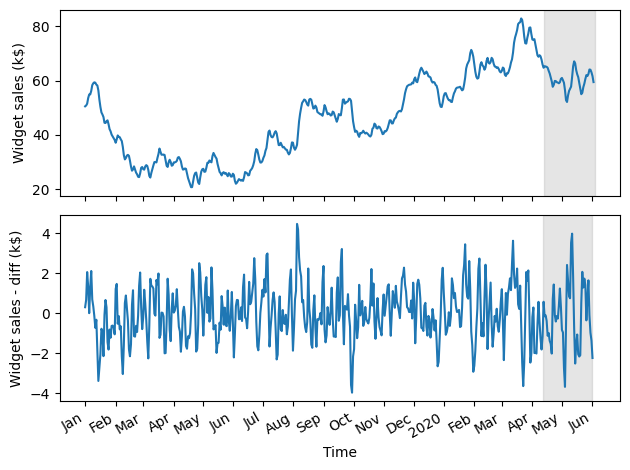

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)
ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409,
     439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
     'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()

plt.tight_layout()

For the forecast horizon, the moving average model brings in a particularity. The MA(q) model does not allow us to forecast 50 steps into the future in one shot. Remember that the moving average model is linearly dependent on past error terms, and those terms are not observed in the dataset—they must therefore be recursively estimated. This means that for an MA(q) model, we can only forecast q steps into the future. Any prediction made beyond that point will not have past error terms, and the model will only predict the mean. Therefore, there is no added value in forecasting beyond q steps into the future, because the predictions will fall flat, as only the mean is returned, which is equivalent to a baseline model.

To avoid simply predicting the mean beyond two timesteps into the future, we need to develop a function that will predict two timesteps or less at a time, until 50 predictions are made, so that we can compare our predictions against the observed values of the test set. This method is called rolling forecasts. On the first pass, we will train on the first 449 timesteps and predict timesteps 450 and 451. Then, on the second pass, we will train on the first 451 timesteps, and predict timesteps 452 and 453.

This is repeated until we finally predict the values at timesteps 498 and 499.

We will compare our fitted MA(2) model to two baselines: the historical mean and the last value. That way, we can make sure that an MA(2) model will yield better predictions than naive forecasts, which should be the case, since we know the stationary process is an MA(2) process.

To create these forecasts, we need a function that will repeatedly fit a model and generate forecasts over a certain window of time, until forecasts for the entire test set are obtained.

First, we import the SARIMAX function from the statsmodels library. This function will allow us to fit an MA(2) model to our differenced series. Note that SARIMAX is a complex model that allows us to consider seasonal effects, autoregressive processes, non-stationary time series, moving average processes, and exogenous variables all in a single model. For now, we will disregard all factors except the moving average portion.

We will gradually build on the moving average model and eventually reach the SARIMAX model in later chapters:
 - Next, we define our rolling_forecast function. It will take in a DataFrame, the length of the training set, the forecast horizon, a window size, and a method. The DataFrame contains the entire time series.
 - The train_len parameter initializes the number of data points that can be used to fit a model. As predictions are done, we can update this to simulate the observation of new values and then use them to make the next sequence of forecasts.
 - The horizon parameter is equal to the length of the test set and represents how many values must be predicted.
 - The window parameter specifies how many timesteps are predicted at a time. In our case, because we have an MA(2) process, the window will be equal to 2.
 - The method parameter specifies what model to use. The same function allows us to generate forecasts from the naive methods and the MA(2) model.

Note the use of type hinting in the function declaration. This will help us avoid passing parameters of an unexpected type, which might cause our function to fail.

Then, each forecasting method is run in a loop. The loop starts at the end of the training set and continues until total_len, exclusive, with steps of window (total_len is the sum of train_len and horizon). This loop generates a list of 25 values, [450,451,452,…,497], but each pass generates two forecasts, thus returning a list of 50 forecasts for the entire test set.

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'MA':
        pred_MA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(0,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)

        return pred_MA

Once it’s defined, we can use our function and forecast using three methods: the historical mean, the last value, and the fitted MA(2) model.

First, we’ll first create a DataFrame to hold our predictions and name it pred_df. We can copy the test set, to include the actual values in pred_df, making it easier to evaluate the performance of our models.

Then, we’ll specify some constants. In Python, it is a good practice to name constants in capital letters. TRAIN_LEN is simply the length of our training set, HORIZON is the length of the test set, which is 50 days, and WINDOW can be 1 or 2 because we are using an MA(2) model. In this case we will use a value of 2.

Next, we’ll use our rolling_forecast function to generate a list of predictions for each method. Each list of predictions is then stored in its own column in pred_df.

In [38]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW,'last')
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA

pred_df.head()

,widget_sales_diff,pred_mean,pred_last_value,pred_MA
449,-1.170131,0.034319,-1.803658,-1.078833
450,0.580967,0.034319,-1.803658,-0.273309
451,-0.144902,0.032861,0.580967,0.781223
452,-0.096564,0.032861,0.580967,0.234969
453,-0.372334,0.032183,-0.096564,0.168994


Now we can visualize our predictions against the observed values in the test set. Keep in mind that we are still working with the differenced dataset, so our predictions are also differenced values.

For this figure, we will plot part of the training data to see the transition between the train and test sets. Our observed values will be a solid line, and we will label this curve as “actual.” Then we’ll plot the forecasts from the historical mean, those from the last observed value, and those from the MA(2) model. They will respectively be a dotted line, a dotted and dashed line, and a dashed line, with labels of “mean,” “last,” and “MA(2).”

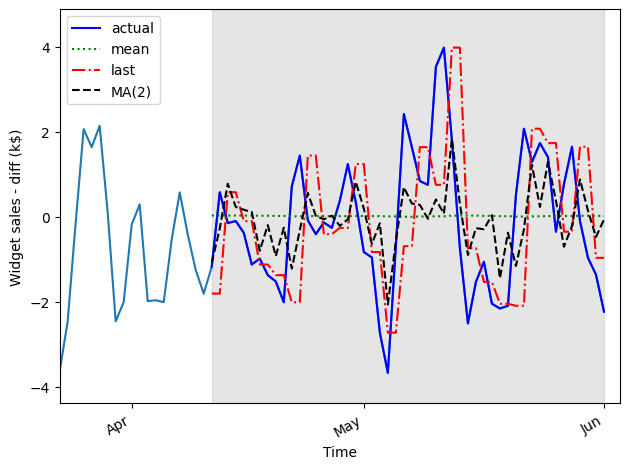

In [39]:
fig, ax = plt.subplots()

ax.plot(df_diff['widget_sales_diff'])
ax.plot(pred_df['widget_sales_diff'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_last_value'], 'r-.', label='last')
ax.plot(pred_df['pred_MA'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

ax.axvspan(449, 498, color='#808080', alpha=0.2)

ax.set_xlim(430, 500)

plt.xticks(
    [439, 468, 498],
    ['Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

In figure 4.8 you’ll notice that the prediction coming from the historical mean, shown as a dotted line, is almost a straight line. This is expected; the process is stationary, so the historical mean should be stable over time.

The next step is to measure the performance of our models. To do so, we will calculate the mean squared error (MSE). Here we will use the mean_squared_error function from the sklearn package. We simply need to pass the observed values and the predicted values into the function.

In [41]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df['widget_sales_diff'],pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['widget_sales_diff'],pred_df['pred_last_value'])
mse_MA = mean_squared_error(pred_df['widget_sales_diff'],pred_df['pred_MA'])

print(mse_mean, mse_last, mse_MA)

2.5606299456880537 3.2494260812249225 1.9481714497559062


Now that we have our champion model on the stationary series, we need to inverse transform our predictions to bring them back to the original scale of the untransformed dataset. Recall that differencing is the result of the difference between a value at time t and its previous value.

In order to reverse our first-order difference, we need to add an initial value $y_0$ to the first differenced value $y^'_1$. That way, we can recover $y_1$ in its original scale.
y1 = y0 + y'1 = y0 + y1 – y0 = y1 Equation


Then $y_2$ can be obtained using a cumulative sum of the differenced values
y2 = y0 + y'1 + y'2 = y0 + y1 – y0 + y2 – y1 = (y0 – y0) + (y1 – y1) + y2 = y2 Equation 4.5

Applying the cumulative sum once will undo a first-order differencing. In the case where the series was differenced twice to become stationary, we would need to repeat this process.

Thus, to obtain our predictions in the original scale of our dataset, we need to use the first value of the test as our initial value. Then we can perform a cumulative sum to obtain a series of 50 predictions in the original scale of the dataset. We will assign these predictions to the pred_widget_sales column.

In [45]:
df['pred_widget_sales'] = pd.Series()
df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()

/tmp/ipykernel_835507/676540636.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['pred_widget_sales'] = pd.Series()


Let’s visualize our untransformed predictions against the recorded data. Remember that we are now using the original dataset stored in df.

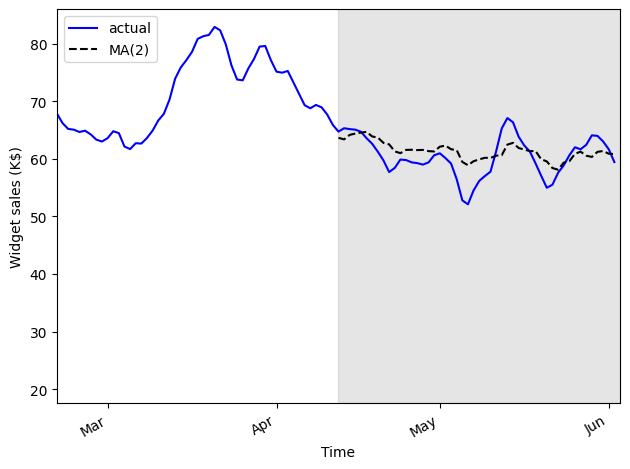

In [46]:
fig, ax = plt.subplots()

ax.plot(df['widget_sales'], 'b-', label='actual')
ax.plot(df['pred_widget_sales'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')

ax.axvspan(450, 500, color='#808080', alpha=0.2)

ax.set_xlim(400, 500)

plt.xticks(
    [409, 439, 468, 498],
    ['Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

The final step is to report the MSE on the original dataset. In a professional setting, we would not report the differenced predictions, because they do not make sense from a business perspective; we must report values and errors in the original scale of the data.

We can measure the mean absolute error (MAE) using the mean_absolute_error function from sklearn. We’ll use this metric because it is easy to interpret, as it returns the average of the absolute difference between the predicted and actual values, instead of a squared difference like the MSE.

In [47]:
from sklearn.metrics import mean_absolute_error

mae_MA_undiff = mean_absolute_error(df['widget_sales'].iloc[450:], df['pred_widget_sales'].iloc[450:])

print(mae_MA_undiff)

2.3244709246094026


This prints out an MAE of 2.32. Therefore, our predictions are, on average, off by $2,320, either above or below the actual value. Remember that our data has units of thousands of dollars, so we multiply the MAE by 1,000 to express the average absolute difference.

<center><img src="https://i.imgur.com/g7ZlS3s.png" alt="Steps to recognize an MA(q) process" title="Steps to recognize an MA(q) process" /></center>